# Setup

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
ibm_hr = pd.read_csv("C:\\Users\\nehab\\OneDrive\\Desktop\\Attrition.csv")

ibm_hr.head()

ibm_hr.isna().sum()

X = ibm_hr.iloc[:, [0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,
                    17,18,19,20,21,22,23,24,25,26,27,28,29,
                    20,31,32,33,34]]
y = ibm_hr.Attrition
y.target_names = ["Attrition", "No Attrition"]
unique, counts = np.unique(y, return_counts=True) 
print("The frequency of instances per class is: " , dict(zip(unique, counts)))
print("The two distinct classes are: Yes - Attrition", "No - No Attrition")

The frequency of instances per class is:  {'No': 1233, 'Yes': 237}
The two distinct classes are: Yes - Attrition No - No Attrition


In [5]:
# Department, EducationField, JobRole, MaritalStatus
unique_department = X['Department'].unique()
print(unique_department) # Sales, Research & Development, Human Resources

unique_education = X['EducationField'].unique()
print(unique_education) # Life Sciences, Other, Medical, Marketing, Technical Degree, Human Resources

unique_job = X['JobRole'].unique()
print(unique_job) #'Sales Executive', 'Research Scientist', 'Laboratory Technician', 'Manufacturing Director', 'Healthcare Representative', 'Manager', 'Sales Representative', 'Research Director', Human Resources

unique_maritalstatus = X['MaritalStatus'].unique()
print(unique_maritalstatus) # Single, Married, Divorced

['Sales' 'Research & Development' 'Human Resources']
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
['Single' 'Married' 'Divorced']


In [6]:
# Ordinal Variable: BusinessTravel
unique_travel = X['BusinessTravel'].unique()
print(unique_travel)
size_mapping = {'Travel_Frequently': 3,
                'Travel_Rarely': 2,
                'Non-Travel': 1}
X['BusinessTravel'] = X['BusinessTravel'].map(size_mapping)

# Binary Variable: Gender
X["Gender"] = X["Gender"].replace(["Male"], 1)
X["Gender"] = X["Gender"].replace(["Female"], 0)
unique_gender = X['Gender'].unique()
print(unique_gender)

# Binary Variable: Over18
X["Over18"] = X["Over18"].replace(["Y"], 1)
X["Over18"] = X["Over18"].replace(["N"], 0)
unique_over18 = ibm_hr["Over18"].unique()
print(unique_over18) #can remove!

# Binary Variable: OverTime
X["OverTime"] = X["OverTime"].replace(["Yes"], 1)
X["OverTime"] = X["OverTime"].replace(["No"], 0)
unique_overtime = X["OverTime"].unique()
print(unique_overtime)

# Get dummy variables for remaining string categorical variables
# Department, EducationField, JobRole, MaritalStatus
X_dummies = pd.get_dummies(X)
# now 51 columns to include all dummy variables for specified fields
# did this without multicollinearity defense to be able to see which factors in each attribute are most/least correlated with attrition

# Remove uninformative attributes
X_dum = X_dummies.drop(columns=['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'])

['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
[0 1]
['Y']
[1 0]


C:\Users\nehab\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\nehab\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\nehab\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [7]:
################################### EDA PART 2 #############################
ibm_new = X_dum
ibm_new["Attrition"] = y
ibm_new["Attrition"] = ibm_new["Attrition"].replace(["Yes"], 1)
ibm_new["Attrition"] = ibm_new["Attrition"].replace(["No"], 0)
unique_attrition = ibm_new['Attrition'].unique()
print(unique_attrition)

# correlation between categorical variables
corrmat = ibm_new.corr()
print(corrmat)

[1 0]
                                        Age  BusinessTravel  DailyRate  \
Age                                1.000000       -0.011807   0.010661   
BusinessTravel                    -0.011807        1.000000  -0.015539   
DailyRate                          0.010661       -0.015539   1.000000   
DistanceFromHome                  -0.001686       -0.009696  -0.004985   
Education                          0.208034       -0.008670  -0.016806   
EnvironmentSatisfaction            0.010146       -0.011310   0.018355   
Gender                            -0.036311       -0.044896  -0.011716   
HourlyRate                         0.024287       -0.004164   0.023381   
JobInvolvement                     0.029820        0.029300   0.046135   
JobLevel                           0.509604       -0.011696   0.002966   
JobSatisfaction                   -0.004892        0.008666   0.030571   
MonthlyIncome                      0.497855       -0.013450   0.007707   
MonthlyRate                     

C:\Users\nehab\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\nehab\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\nehab\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

In [8]:
from sklearn.utils import resample
X_new = ibm_new.iloc[:, 0:47]
y_new = ibm_new.iloc[:, -1]

y_pred = np.zeros(y_new.shape[0])
np.mean(y_pred == y_new) * 100

print('Number of class 1 (malignant) samples before:', X_new[y_new == 1].shape[0])
X_upsampled, y_upsampled = resample(X_new[y_new == 1], 
                                    y_new[y_new == 1],
                                    replace=True,
                                    n_samples=X_new[y_new == 0].shape[0],
                                    random_state=42)

print('Number of class 1 (malignant) samples after:', X_upsampled.shape[0])
X_bal = np.vstack((X_new[y_new == 0], X_upsampled))
y_bal = np.hstack((y_new[y_new == 0], y_upsampled))


ibm_bal = pd.DataFrame(X_bal)
ibm_bal['Attrition'] = y_bal
list(ibm_new.columns.values)
ibm_bal.columns = ['Age',
 'BusinessTravel',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'DUPLICATE',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'Department_Human Resources',
 'Department_Research & Development',
 'Department_Sales',
 'EducationField_Human Resources',
 'EducationField_Life Sciences',
 'EducationField_Marketing',
 'EducationField_Medical',
 'EducationField_Other',
 'EducationField_Technical Degree',
 'JobRole_Healthcare Representative',
 'JobRole_Human Resources',
 'JobRole_Laboratory Technician',
 'JobRole_Manager',
 'JobRole_Manufacturing Director',
 'JobRole_Research Director',
 'JobRole_Research Scientist',
 'JobRole_Sales Executive',
 'JobRole_Sales Representative',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'Attrition']

#drop duplicate "numcompaniesworked"
ibm_final = ibm_bal.drop(columns=['DUPLICATE'])

# Add new estimated features
ibm_final ['Fidelity'] = ibm_final ['NumCompaniesWorked'] / ibm_final['TotalWorkingYears']
ibm_final ['Fidelity'] = ibm_final ['Fidelity'].replace(np.Inf, 0)

ibm_final ['JobSatisf_mean'] = (ibm_final['JobSatisfaction'] + ibm_final['JobInvolvement']) / 2

ibm_final ['Annual Compensation'] = ibm_final['MonthlyRate'] * 12

ibm_final ['Annual Salary'] = ibm_final['MonthlyIncome'] * 12

ibm_final ['Bonus'] = ibm_final['Annual Compensation'] - ibm_final['MonthlyIncome'] * 12


# Put the target variable to the last column
last_col = ibm_final.pop(ibm_final.columns[46])

ibm_final.insert(51,last_col.name,last_col)


# final correlation matrix
corrmat_final = ibm_final.corr()
print(corrmat_final)

#defining X and y for the last time
X_final = ibm_final.iloc[:, 0:51]

y_final = ibm_final.iloc[:, -1]

# double checking to make sure it's truly balanced
y_pred = np.zeros(y_final.shape[0])
np.mean(y_pred == y_final) * 100

#### may need to remove a few to reduce multicollinearity - best to remove due to low correlation are:
# JobRole_Research Scientist
# EducationField_Other
# Department_Human Resources
# MaritalStatus_Married
# May want to consider removing "Department" altogether since they're all highly correlated with the job roles that fall under them

#dropping multicollinear columns from X
X_final_small = X_final.drop(columns=['JobRole_Research Scientist', 'EducationField_Other', 'Department_Human Resources', 'MaritalStatus_Married', 'Department_Research & Development', 'Department_Sales'])


Number of class 1 (malignant) samples before: 237
Number of class 1 (malignant) samples after: 1233
                                        Age  BusinessTravel  DailyRate  \
Age                                1.000000       -0.069811   0.032938   
BusinessTravel                    -0.069811        1.000000  -0.049181   
DailyRate                          0.032938       -0.049181   1.000000   
DistanceFromHome                  -0.014866       -0.028427  -0.032780   
Education                          0.179906       -0.021432  -0.028772   
EnvironmentSatisfaction            0.008489        0.011227  -0.008565   
Gender                             0.020304       -0.061539  -0.024008   
HourlyRate                         0.062797       -0.042928   0.088007   
JobInvolvement                     0.053470       -0.038139   0.057070   
JobLevel                           0.523330       -0.102045   0.035356   
JobSatisfaction                    0.040158        0.053294   0.033356   
MonthlyIncom

In [10]:
# NOTE 1: Different Sets of Data to use are:
##  ibm_hr, X, y = no transformations
##  ibm_new, X_new, y_new = all categorical variables transformed, unbalanced
##  ibm_final, X_final, y_final = transformed and balanced
##  X_final_small = transformed, balanced, and with multicollinearity removed
##  X_std = transformed, balanced, standardized, and without multicolinearity 

# NOTE 2: Total x-variables in X_final: 46
##  Total x-variables in X_final_small: 40

# NOTE 3: models below are being evaluation with X_final/X_std and y_final

from sklearn.preprocessing import StandardScaler
#Standardized data: 
sc = StandardScaler()
sc.fit(X_final_small)
X_std = sc.transform(X_final_small)

# Decision Tree Classifier - non-standardized
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X_std, y_final,
                                                    test_size=0.30,
                                                    random_state=42,
                                                    stratify=y_final)

inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

gs_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
            param_grid=[{'max_depth': [5, 10, 25, 50, 75],
                        'max_features': [5, 10, 15, 20, 25, 30, 35, 40, 46],
                        'criterion':['gini','entropy'],
                        'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
                        'min_samples_split':[2,3,4,5]}],
                  scoring='f1_macro',
                  cv=inner_cv,
                  n_jobs=5)

gs_dt = gs_dt.fit(X_std,y_final)
print("Decision Tree Parameter Tuning")
print("Non-nested CV F1: ", gs_dt.best_score_)
print("Optimal Parameter: ", gs_dt.best_params_)
print("Optimal Estimator: ", gs_dt.best_estimator_)
nested_score_gs_dt = cross_val_score(gs_dt, X=X_final, y=y_final, cv=outer_cv, n_jobs=5)
print("Nested CV F1: ",nested_score_gs_dt.mean(), " +/- ", nested_score_gs_dt.std())

Decision Tree Parameter Tuning
Non-nested CV F1:  0.9340118658175711
Optimal Parameter:  {'criterion': 'gini', 'max_depth': 25, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Optimal Estimator:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=25, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
Nested CV F1:  0.923697876636469  +/-  0.005012231414063045


# Model Evaluation

In [11]:
###################################### MODEL OPTIMIZATION ######################################################################
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score

inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

gs_dt = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
            param_grid=[{'max_depth': [5, 10, 25, 50, 75],
                        'max_features': [5, 10, 15, 20, 25, 30, 35, 40, 46],
                        'criterion':['gini','entropy'],
                        'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10],
                        'min_samples_split':[2,3,4,5]}],
                  scoring='f1_macro',
                  cv=inner_cv,
                  n_jobs=5)

gs_dt = gs_dt.fit(X_std,y_final)
print("Decision Tree Parameter Tuning")
print("Non-nested CV F1: ", gs_dt.best_score_)
print("Optimal Parameter: ", gs_dt.best_params_)
print("Optimal Estimator: ", gs_dt.best_estimator_)
nested_score_gs_dt = cross_val_score(gs_dt, X=X_std, y=y_final, cv=outer_cv, n_jobs=5)
print("Nested CV F1: ",nested_score_gs_dt.mean(), " +/- ", nested_score_gs_dt.std())

Decision Tree Parameter Tuning
Non-nested CV F1:  0.9340118658175711
Optimal Parameter:  {'criterion': 'gini', 'max_depth': 25, 'max_features': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Optimal Estimator:  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=25, max_features=10, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')
Nested CV F1:  0.920743313251967  +/-  0.004966373926848837


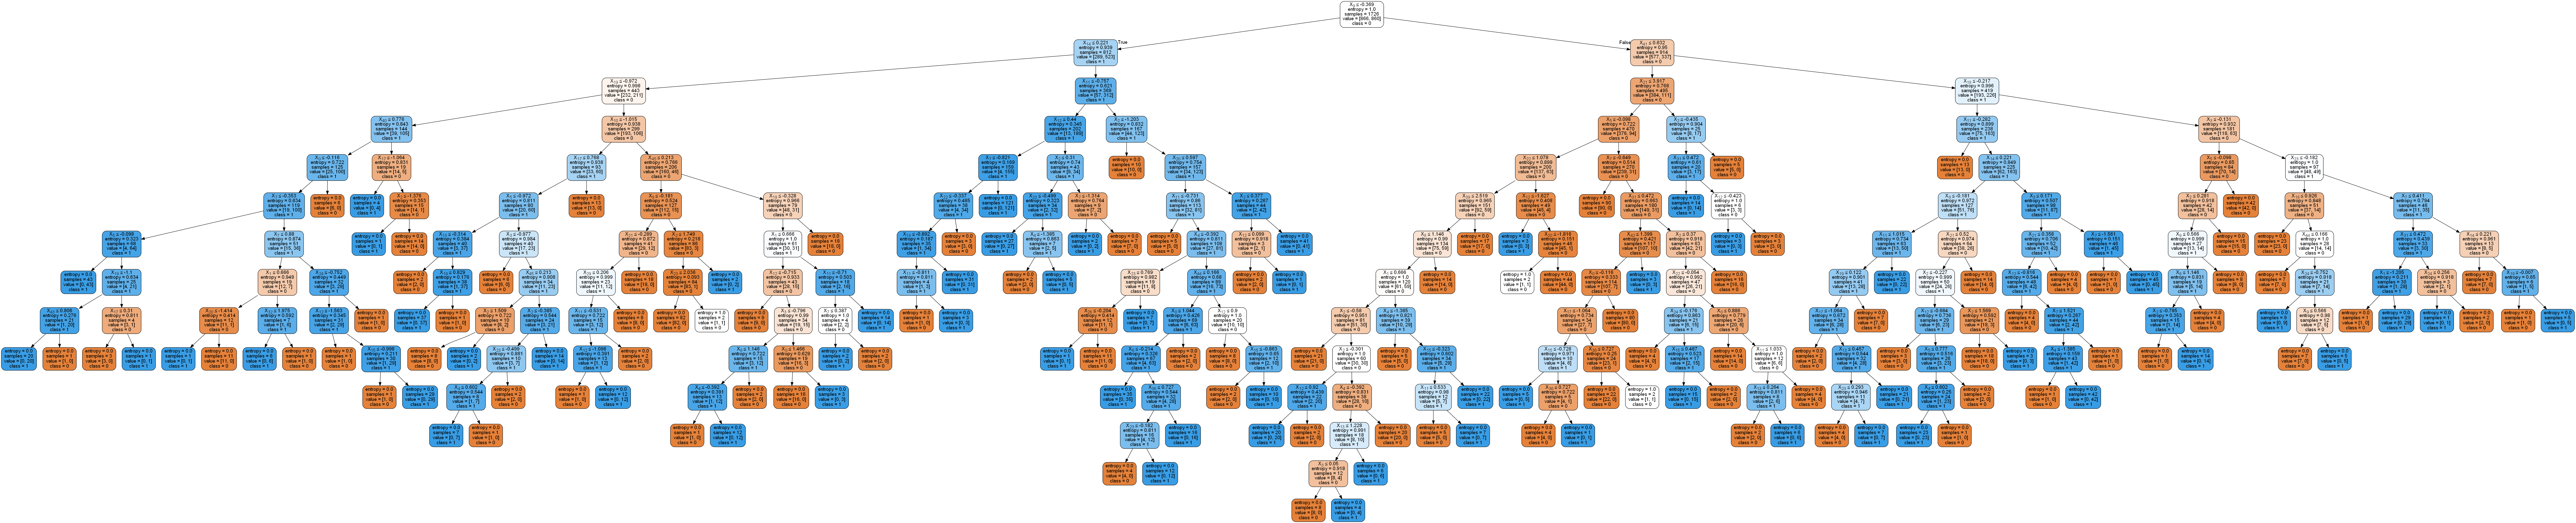

In [19]:
########################## VISUALIZING DECISION TREE ###########################################################################
#Imports
from sklearn.tree import export_graphviz
import graphviz

from IPython.display import Image
import pydotplus
import io

dot_data = io.StringIO()

export_graphviz(clf_dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, class_names=['0','1']) #need to add feature_names
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

In [12]:
########################################## FITTING GRAPH #######################################################################
#STANDARDIZED DATA 
#Imports
import pandas as pd 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt

np.random.seed(42) 

X_train, X_test, y_train, y_test = train_test_split(X_std,y_final, test_size=0.2, random_state=42)

clf_dt = DecisionTreeClassifier(criterion='entropy', max_depth=25, max_features=35, min_samples_leaf=1, min_samples_split=3 ) 

# Evaluate performance
scores=cross_val_score(clf_dt, X=X_std, y=y_final, cv=5, scoring='f1_macro')
print("F1_score: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

F1_score: 0.93 (+/- 0.02)


In [13]:
param_range = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75]
# Determine training and test scores for varying parameter values.
train_scores, test_scores = validation_curve( 
                estimator=DecisionTreeClassifier(random_state=42), 
                X=X_std, 
                y=y_final, 
                param_name="max_depth",
                param_range=param_range,
                cv=5,  
                scoring="f1_macro", 
                n_jobs=4) 

# Cross validation statistics for training and testing data (mean and standard deviation)
train_mean = np.mean(train_scores, axis=1) 
train_std = np.std(train_scores, axis=1)   
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

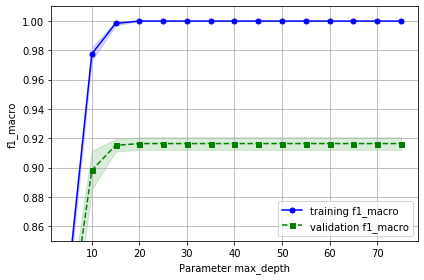

In [14]:
# Plot train accuracy means of cross-validation for all the parameters in param_range
plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training f1_macro')

# Fill the area around the line to indicate the size of standard deviations of performance for the training data
plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

# Plot test accuracy means of cross-validation for all the parameters C in param_range
plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation f1_macro')

# Fill the area around the line to indicate the size of standard deviations of performance for the test data
plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')

# Grid and Axes Titles
plt.grid()
plt.legend(loc='lower right')
plt.xlabel('Parameter max_depth')
plt.ylabel('f1_macro')
plt.ylim([0.85, 1.01]) # y limits in the plot
plt.tight_layout()
plt.show()           

In [15]:
############################################## ROC CURVE #######################################################################
#Imports
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc

#Splitting the data into training and test
X_train, X_test, y_train, y_test = train_test_split(X_std, y_final, test_size=0.3, random_state=42)

In [16]:
clf_dt = DecisionTreeClassifier(criterion='entropy', max_depth=25, max_features=35, min_samples_leaf=1, min_samples_split=3 ) 

#Cross-Validation
print('5-fold cross validation:\n')
scores = cross_val_score(estimator=clf_dt,  #Estimate AUC based on cross validation
                             X=X_std,
                             y=y_final,
                             cv=5,
                             scoring='roc_auc')
print("ROC AUC: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), ["Decision Tree CLassifier"]))

5-fold cross validation:

ROC AUC: 0.93 (+/- 0.01) [['Decision Tree CLassifier']]


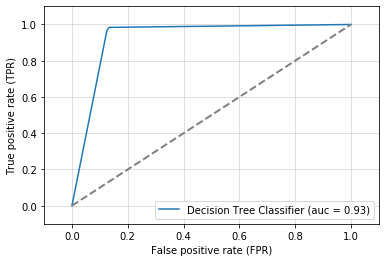

In [17]:
colors = [ 'orange', 'blue', 'green']      
linestyles = [':', '--', '-.', '-']   

y_pred = clf_dt.fit(X_train, 
                    y_train).predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_true=y_test,y_score=y_pred)
roc_auc = auc(x=fpr, y=tpr)             
plt.plot(fpr, tpr, label='%s (auc = %0.2f)' % ("Decision Tree Classifier", roc_auc))

plt.legend(loc='lower right')    # Where to place the legend
plt.plot([0, 1], [0, 1], # Visualize random classifier
         linestyle='--',
         color='gray',
         linewidth=2)

plt.xlim([-0.1, 1.1])   #limits for x axis
plt.ylim([-0.1, 1.1])   #limits for y axis
plt.grid(alpha=0.5)
plt.xlabel('False positive rate (FPR)')
plt.ylabel('True positive rate (TPR)')


#plt.savefig('ROC_all_classifiers', dpi=300)
plt.show()

Confusion matrix, without normalization
[[321  46]
 [ 12 361]]
Normalized confusion matrix
[[0.87 0.13]
 [0.03 0.97]]


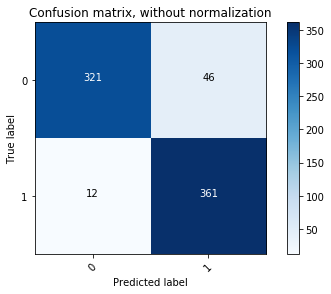

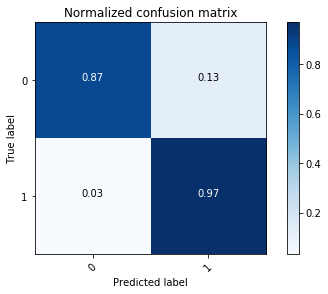

In [26]:
#Imports
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report, confusion_matrix, precision_score, recall_score
import itertools
import matplotlib.pyplot as plt

#Build and view the confusion matrix 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
#Compute accuracy using Confusion Matrix    
cnf_matrix = confusion_matrix(y_test, y_pred.round())
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["0", "1"],
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["0", "1"],normalize=True,
                      title='Normalized confusion matrix')

plt.show()

In [12]:
#####Features importance
clf_dt = DecisionTreeClassifier(criterion='entropy', max_depth=25, max_features=35, min_samples_leaf=1, min_samples_split=3 ) 
clf_dt = clf_dt.fit(X_final_small,y_final)

import seaborn as sns
import matplotlib.pyplot as plt

column_data = pd.DataFrame(X_final_small)
column_data


FI = clf_dt.feature_importances_
FI

Col_name = column_data.columns.values.tolist() 
Col_name

def plot_feature_importance(model):
    
    

    Show = pd.DataFrame({'features':Col_name, 'Features importance': FI})
    Show = Show.sort_values(by='Features importance',ascending=False).head(20)
    plt.figure(figsize = (9,11))
    plt.title('Top 20 - Features importance',fontsize=14)
    s = sns.barplot(y='features',x='Features importance',data=Show, orient='h',palette='magma')
    plt.show()

plot_feature_importance(clf_dt)

In [ ]:
######Explore the improtant features with target variable
import plotly.figure_factory as ff
import plotly.offline as py
py.init_notebook_mode()
import plotly
from plotly import version
print (version)
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

attrition = ibm_final[(ibm_final['Attrition'] != 0)]
no_attrition = ibm_final[(ibm_final['Attrition'] == 0)]

def plot_distribution(var_select, bin_size): 
# Calculate the correlation coefficient between the new variable and the target variable
    corr = ibm_final['Attrition'].corr(ibm_final[var_select])
    corr = np.round(corr,3)
    tmp1 = attrition[var_select]
    tmp2 = no_attrition[var_select]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['Yes_attrition', 'No_attrition']
    colors = ['purple', 'yellow']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, curve_type='kde', bin_size = bin_size)
    fig.add_annotation(dict(font=dict(color='black',size=15),
                                        x=0,
                                        y=0.12,
                                        showarrow=False,
                                        text=str(var_select),
                                        textangle=0,
                                        xanchor='left',
                                        xref="paper",
                                        yref="paper"))
    
    fig.show()
    #fig['layout'].update(title = var_select+' '+'(corr target ='+ str(corr)+')')

    py.plot(fig, filename = 'Density plot')
   
plot_distribution('Fidelity', False)
plot_distribution('Annual Salary',False)


def barplot(var_select, x_no_numeric) :
    tmp1 = ibm_final[(ibm_final['Attrition'] != 0)]
    tmp2 = ibm_final[(ibm_final['Attrition'] == 0)]
   

    
    trace1 = go.Bar(
        x=tmp1[var_select].value_counts().keys().tolist(),
        y=tmp1[var_select].value_counts().values.tolist(),
        name='Yes_Attrition',opacity = 0.8, marker=dict(
        color='purple',
        line=dict(color='#000000',width=1)))

    
    trace2 = go.Bar(
        x=tmp2[var_select].value_counts().keys().tolist(),
        y=tmp2[var_select].value_counts().values.tolist(),
        name='No_Attrition', opacity = 0.8, marker=dict(
        color='yellow',
        line=dict(color='#000000',width=1)))


    layout = dict(title =  str(var_select),
              xaxis=dict(), 
              yaxis=dict(title= 'Count'), 
              )

    fig = go.Figure(data=[trace1, trace2], layout=layout)
    py.plot(fig)        


barplot('Age', False)
barplot('DistanceFromHome', False)
barplot('JobSatisf_mean',False)

def plot_pie(var_select) :
   
    colors = ['black', 'purple', 'red', 'yellow']
    trace1 = go.Pie(values  = attrition[var_select].value_counts().values.tolist(),
                    labels  = attrition[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hoverinfo = "label+percent+name",
                    domain  = dict(x = [0,.48]),
                    name    = "attrition employes",
                    marker  = dict(colors = colors, line = dict(width = 1.5)))
    trace2 = go.Pie(values  = no_attrition[var_select].value_counts().values.tolist(),
                    labels  = no_attrition[var_select].value_counts().keys().tolist(),
                    textfont=dict(size=15), opacity = 0.8,
                    hoverinfo = "label+percent+name",
                    marker  = dict(colors = colors, line = dict(width = 1.5)),
                    domain  = dict(x = [.52,1]),
                    name    = "Non attrition employes" )

    layout = go.Layout(dict(title = var_select + " distribution in employes attrition ",
                            annotations = [dict(text = "Yes_attrition",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .22, y = -0.1),
                                            dict(text = "No_attrition",
                                                font = dict(size = 13),
                                                showarrow = False,
                                                x = .8,y = -.1)]))
                                          

    fig  = go.Figure(data = [trace1,trace2],layout = layout)
    py.plot(fig)

plot_pie('StockOptionLevel')
plot_pie('OverTime')
#####Profit Curve
from sklearn.metrics import accuracy_score, f1_score, cohen_kappa_score, classification_report, confusion_matrix, precision_score, recall_score

def standard_confusion_matrix(y_true, y_pred):
  
    
    [[tn, fp], [fn, tp]] = confusion_matrix(y_true, y_pred)
    return np.array([[tp, fp], [fn, tn]])



def plot_profit_curve(costbenefit_mat, y_proba, y_test):
    
    thresholds = sorted(y_proba, reverse=True)
    
    # For each threshold, calculate profit - starting with largest threshold
    profits = []
    for i in thresholds:
      y_pred = (y_proba > i).astype(int)
     
      
      confusion_mat = standard_confusion_matrix(y_test, y_pred)
    # Calculate total profit for this threshold
      profit = sum(sum(confusion_mat * costbenefit_mat)) / len(y_test)
      profits.append(profit)
      

    # Profit curve plot
    
    max_profit = max(profits)
    max_profit = round(max_profit, 4)
    plt.plot(np.linspace(0, 1, len(y_test)), profits, label="Max profit(gain) per employee = " + repr(max_profit))

    # Plot labels
    plt.xlabel('Percentage of test instances (decreasing by scoring)')
    plt.ylabel('Profit')
    plt.title('Profit Curves')
    plt.legend(loc='lower left')
    plt.show()




clf_dt = DecisionTreeClassifier(criterion='entropy', max_depth=25, max_features=35, min_samples_leaf=1, min_samples_split=3) 

clf_dt.fit(X_train, y_train)

y_proba = clf_dt.predict_proba(X_test)[:, 1]



#####Benefit/Cost matrix

mean_work_currCom = np.mean(X_final_small['YearsAtCompany'])
mean_work_currCom

mean_promo_year = np.mean(X_final_small['YearsSinceLastPromotion'])
mean_promo_year
#We make assumption that each employee will get a promotion every 2 years 
#so that there will be 3 promotions if he/she can stay at company
#We use 1.2X to consider the salary increase of promotion
mean_salary = np.mean(X_final_small['Annual Salary'])
mean_salary

##We plan to use the max of percent salary hike to persuade the employee to stay at company
max_salaryHike = np.max(X_final_small['PercentSalaryHike'])
max_salaryHike


#Estimate process
multiple_Hike = (max_salaryHike + 100) / 100
multiple_Hike
new_salary = multiple_Hike * mean_salary
new_salary
new_salary_prom1 = new_salary * 1.2 
new_salary_prom1
new_salary_prom2 = new_salary_prom1 * 1.2
new_salary_prom2

#Total salary for 6 years
total_salary_prom = new_salary * 2 + new_salary_prom1 * 2 + new_salary_prom2 * 2
total_salary_prom

#The cost of a employee if he still want to leave. We make a assumption that 
#let the cost = the increase salary for the month when he leaves the company
mean_salaryHike = np.mean(X_final_small['PercentSalaryHike'])
cost_percent = max_salaryHike - mean_salaryHike

mean_monthSalary = np.mean(X_final_small['MonthlyIncome'])
cost = mean_monthSalary * (cost_percent + 100) / 100
cost

#Cost for succeeding pursuading the employee to stay at company
total_cost = total_salary_prom + cost
total_cost

profit_created = total_salary_prom * 6
benefit = profit_created - total_cost
benefit

costbenefit_mat = np.array([[0, 0],
                            [-6383.43, 3167772.95]])
    
plot_profit_curve(costbenefit_mat, y_proba, y_test)


y_proba_1 = LG_dt.predict_proba(X_test)[:, 1]

plot_profit_curve(costbenefit_mat, y_proba_1, y_test)



LG_dt = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
LG_dt.fit(X_train,y_train)
